### The Spark Foundation :Data Science and business analytics Intership
#### Task 1:Prediction Using Supervised Machine Learning Problem
####  Statement:Predict the percentage of an student based on the no. of study hours.

### Step 1:Processing the Dataset

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
data=pd.read_csv("http://bit.ly/w-data")
data.head()      #Used to read first five rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape #gives number of rows and columns

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe() # Show the minimum, maximum, average value of dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum() # Gives the total null value count

Hours     0
Scores    0
dtype: int64

### Step 2:Visualization of data

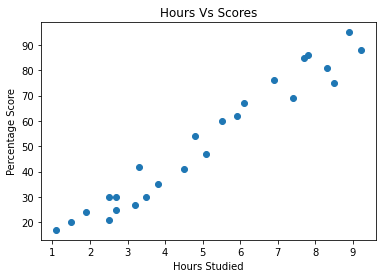

In [7]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

###  > The above Scatter plot shows the relationship between Students Study hours and their repspctive Scores.
###  > From above graph we conclude that as Study hours increases marks are also increasing

# ## Step3:Prepare the data set for machine learning algorithm

In [8]:
# Data Cleaning
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [9]:
data2=data.fillna(data.mean())
data2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#Split the dataset for trainig
x=data2.drop("Scores",axis="columns")
y=data2.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x train (20, 1)
shape of y train (20, 1)
shape of x_test (5, 1)
shape of y_test (5, 1)


# ## Step4:Select the model and train it

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
lr.coef_

array([[9.94061514]])

In [16]:
lr.intercept_

array([1.50791048])

In [17]:
m=3.93
c=50.44
y=m*12+c
y

97.6

In [18]:
lr.predict([[4]])[0][0].round(2)

41.27

In [19]:
y_pred=lr.predict(x_test)
y_pred

array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [20]:
lr.score(x_test,y_test)

0.9735538080811826

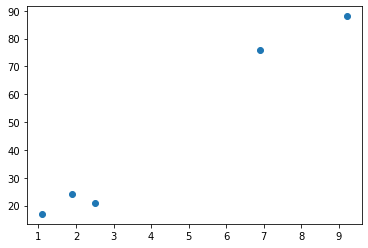

In [21]:
plt.scatter(x_test,y_test)

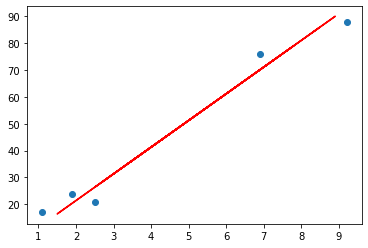

In [23]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color='red')

In [24]:
import joblib
joblib.dump(lr,"Students_marks_predictor.pkl")

['Students_marks_predictor.pkl']

In [25]:
model=joblib.load("students_marks_predictor.pkl")
model.predict([[9.25]])

array([[93.45860056]])

### If student will studied 9.25 Hours then the predicted score of student is 93.45860056

# ## Thank You!